In [2]:
import pandas as pd

# Load the CSV files
file_4kb_path = './4kb-result.csv'
file_2mb_path = './2mb-result.csv'

data_4kb = pd.read_csv(file_4kb_path)
data_2mb = pd.read_csv(file_2mb_path)

# Display the first few rows of both datasets to understand their structure
data_4kb.head(), data_2mb.head()

(  memsize  frequency  latency
 0    200m    179.385   71.750
 1      1g    184.105   73.625
 2      2g    184.510   73.800
 3      4g    184.700   73.900
 4      8g    184.710   73.900,
   memsize  frequency  latency
 0    200m    178.545   71.410
 1      1g    184.585   73.815
 2      2g    184.115   73.650
 3      4g    183.495   73.400
 4      8g    183.500   73.400)

In [3]:
import matplotlib.pyplot as plt

# Convert memsize to a consistent numeric scale for proper plotting
def convert_memsize(memsize):
    if isinstance(memsize, str) and 'm' in memsize:
        return float(memsize.replace('m', '')) / 1000  # Convert MB to GB
    elif isinstance(memsize, str) and 'g' in memsize:
        return float(memsize.replace('g', ''))
    return memsize

data_4kb['memsize_gb'] = data_4kb['memsize'].apply(convert_memsize)
data_2mb['memsize_gb'] = data_2mb['memsize'].apply(convert_memsize)

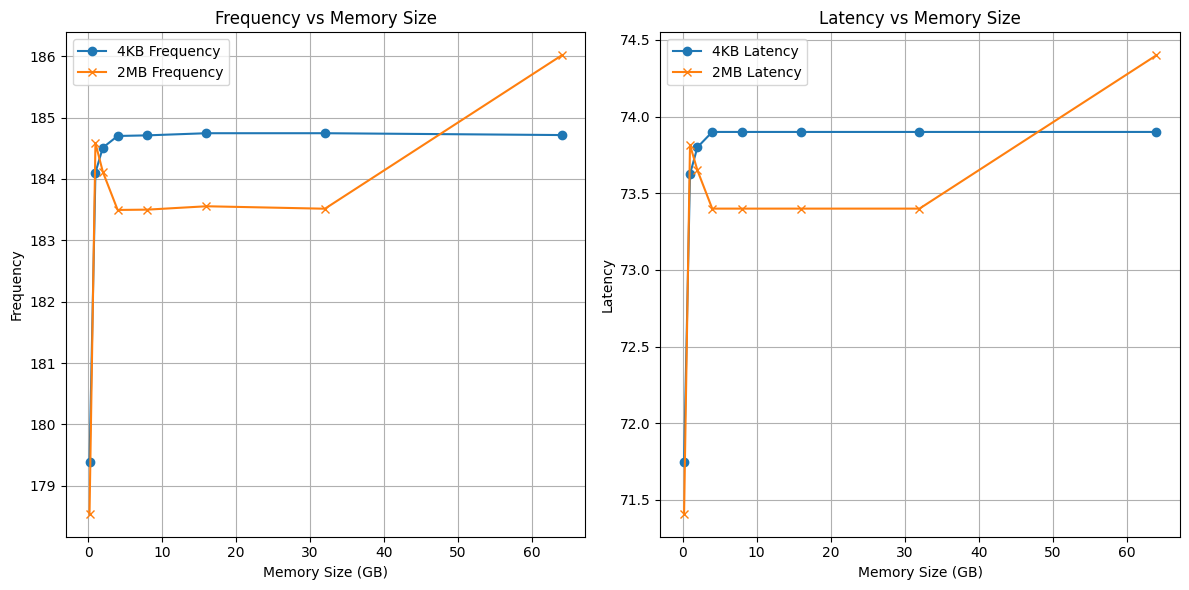

In [4]:
# Plotting
plt.figure(figsize=(12, 6))

# Plot Frequency
plt.subplot(1, 2, 1)
plt.plot(data_4kb['memsize_gb'], data_4kb['frequency'], label='4KB Frequency', marker='o')
plt.plot(data_2mb['memsize_gb'], data_2mb['frequency'], label='2MB Frequency', marker='x')
plt.title('Frequency vs Memory Size')
plt.xlabel('Memory Size (GB)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)

# Plot Latency
plt.subplot(1, 2, 2)
plt.plot(data_4kb['memsize_gb'], data_4kb['latency'], label='4KB Latency', marker='o')
plt.plot(data_2mb['memsize_gb'], data_2mb['latency'], label='2MB Latency', marker='x')
plt.title('Latency vs Memory Size')
plt.xlabel('Memory Size (GB)')
plt.ylabel('Latency')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()